### Exercise 1

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit,vectorize,float64

In [81]:
S=20
p=0.5

def ϕ():
    return np.random.geometric(p) - 1

def G(x, d, s):
    if x <= s:
        return max(S - d, 0)
    else:
        return max(x - d, 0)

def h(x, s):
    if x <= s:
        return S
    else:
        return x

def c(x, s):
    if x <= s:
        return 1
    else:
        return 0

In [92]:
@jit(parallel=True)
def profit_max(s=np.linspace(0,21,1000),
              π_ave_pro=np.empty(1000),
              sim_length = 1000,
              initial_x = 10):
    for i,s_ in enumerate(s):
        X = np.empty(sim_length)
        π_pro = np.empty(sim_length)
        X[0] = initial_x

        for t in range(sim_length-1):
            D = ϕ()
            π_pro[t]=np.min((h(X[t],s_),D))- c(X[t], s_)
            X[t+1] = G(X[t], D, s_)
    
        π_ave_pro[i]=np.average(π_pro)
    return π_ave_pro

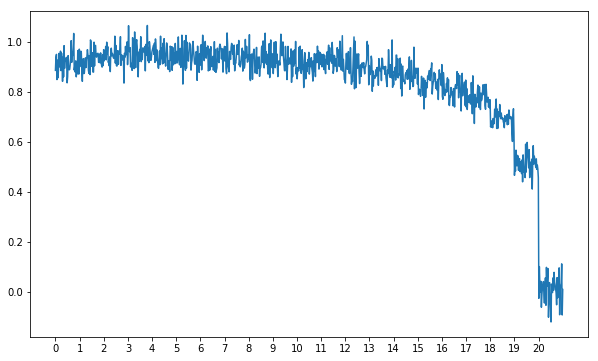

225


In [93]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(s,profit_max())
ax.set_xticks(np.linspace(0,20,21))
plt.show()
print(np.argmax(π_ave_pro))

** Interpretation **  
We have changed the initial value of x, and the index of maximum point (225, which means s = 2.25) remains constant.  
Therefore, when s is 2.25, the profits is achieved optimally.